In [1]:
!unzip -q /content/train_data.zip

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 11212, done.
remote: Total 11212 (delta 0), reused 0 (delta 0), pack-reused 11212
Receiving objects: 100% (11212/11212), 11.16 MiB | 25.22 MiB/s, done.
Resolving deltas: 100% (7749/7749), done.


In [3]:
%cd yolov5/

/content/yolov5


In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [8]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

# Images
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-9 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 291.5ms pre-process, 29.0ms inference, 21.7ms NMS per image at shape (1, 3, 384, 640)


In [19]:
!python train.py --img 416 --batch 8 --epochs 50 --data coco128.yaml --weights yolov5s.pt --nosave --cache 

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=416, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, 

In [ ]:
!python detect.py --source /content/test/images --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 416 --save-txt --save-conf

In [28]:
 !python detect.py --weights /content/yolov5/runs/train/exp8/weights/best.pt --img 416 --conf 0.35 --source /content/train_data/images/val/

detect: weights=['/content/yolov5/runs/train/exp8/weights/best.pt'], source=/content/train_data/images/val/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/3 /content/train_data/images/val/1.jpg: 352x416 2 laptops, Done. (0.027s)
image 2/3 /content/train_data/images/val/3.jpg: 416x416 1 laptop, Done. (0.029s)
image 3/3 /content/train_data/images/val/4.jpg: 256x416 2 laptops, Done. (0.024s)
Speed: 0.4ms pre-process, 26.6ms inference, 2.3ms NMS per image at shape (1, 3, 416, 416)
Results sa

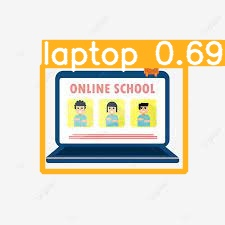

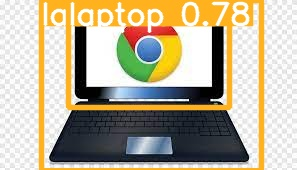

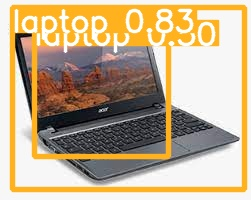

In [29]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp6/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")